In [13]:
import sqlite3
import pandas as pd

import matplotlib.pyplot as plt

conn = sqlite3.connect('poker_updated.db')
c = conn.cursor()

In [36]:
df = pd.read_sql_query('SELECT * from Hands LIMIT 20;', conn)

In [152]:
#get all preflop action
actions_df = pd.read_sql_query('SELECT Actions.game_ID, Actions.player_ID, Actions.round_k, Actions.action_id, \
                       Hands.net_gain from Actions LEFT JOIN Hands ON Actions.game_ID = Hands.game_ID \
                       AND Actions.player_ID = Hands.player_ID;', conn)
print(actions_df.head(10))

          game_ID             player_ID  round_k action_id  net_gain
0  20161129152537            StephCurry        0         f       0.0
1  20161129152537           PANDAisEVIL        0         f       0.0
2  20161129152537             AironVega        0         f       0.0
3  20161129152537               IlxxxlI        0         f       0.0
4  20161129152537         pineapplesand        0         f       0.0
5  20161129152537              dankmann        0         r       1.5
6  20161129152537             ElvenEyes        0         f       0.0
7  20161129152537                  gust        0         f      -0.5
8  20161129152537  VegetablesArentYummy        0         f      -1.0
9  20161129152638           PANDAisEVIL        0         f       0.0


In [154]:
net_gains_df = pd.read_sql_query('SELECT player_ID, net_gain from Hands;', conn)
print(net_gains_df.head(10))

              player_ID  net_gain
0            StephCurry      0.00
1           PANDAisEVIL      0.00
2             AironVega      0.00
3               IlxxxlI      0.00
4         pineapplesand      0.00
5              dankmann      1.50
6             ElvenEyes      0.00
7                  gust     -0.50
8  VegetablesArentYummy     -1.00
9            StephCurry     -0.66


In [155]:
total_games_df = pd.read_sql_query('SELECT player_ID, COUNT(*) AS total_games from Hands \
    GROUP BY player_ID;', conn)
print(total_games_df.head(10))

          player_ID  total_games
0     !MushroomMan!           54
1              ....           83
2             00MOD           10
3          01001111           22
4        0nlyDaNuts          260
5  1000_na_nl25_aga          305
6          10071995           81
7         100stacks           50
8        11-10-1964           64
9         12monkeys          242


In [156]:
preflop_df = actions_df[actions_df['round_k'] == 0]
river_df = actions_df[actions_df['round_k'] == 3]

In [157]:
#computes net gains
net_gains = {} # net gains for each player
for _, row in net_gains_df.iterrows():
    player_ID = row['player_ID']
    if player_ID not in net_gains:
        net_gains[player_ID] = row['net_gain']
    else:
        net_gains[player_ID] += row['net_gain']

In [158]:
total_games = {}
for _, row in total_games_df.iterrows():
    player_ID = row['player_ID']
    total_games[player_ID] = row['total_games']

In [138]:
preflop_folds = {} # number of times a player folds preflop
for _, row in preflop_df.iterrows():
    player_ID = row['player_ID']
    if player_ID not in preflop_folds:
        preflop_folds[player_ID] = 0
        
    if player_ID in preflop_folds and row['action_id'] == 'f':
        preflop_folds[player_ID] += 1

Text(0, 0.5, 'average net gain')

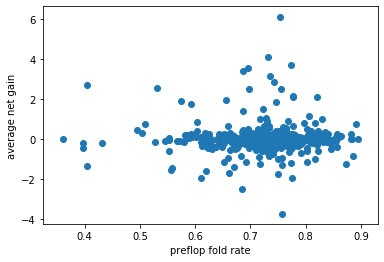

In [143]:
preflop_fold_rate = []
avg_net_gains = []
for player_ID in preflop_folds:
    if net_gains[player_ID] < -1000 or total_games[player_ID] < 100: #exclude outliers
        continue
    preflop_fold_rate.append(preflop_folds[player_ID]/total_games[player_ID])
    avg_net_gains.append(net_gains[player_ID]/total_games[player_ID])

plt.scatter(preflop_fold_rate, avg_net_gains)
plt.xlabel("preflop fold rate")
plt.ylabel("average net gain")

In [144]:
showdowns = {} # number of times a player goes to showdown
for _, row in river_df.iterrows():
    player_ID = row['player_ID']
    if player_ID not in showdowns:
        showdowns[player_ID] = 0
        
    if player_ID in showdowns and row['action_id'] != 'f':
        showdowns[player_ID] += 1

Text(0, 0.5, 'average net gain')

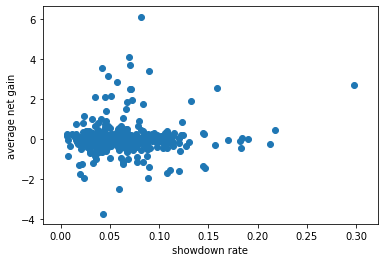

In [150]:
showdown_rate = []
avg_net_gains = []
for player_ID in showdowns:
    if total_games[player_ID] < 100: #exclude outliers
        continue
    showdown_rate.append(showdowns[player_ID]/total_games[player_ID])
    avg_net_gains.append(net_gains[player_ID]/total_games[player_ID])

plt.scatter(showdown_rate, avg_net_gains)
plt.xlabel("showdown rate")
plt.ylabel("average net gain")